# Ant Colony Optimization (ACO) for Legal Document Retrieval

In [1]:
corpus=[

    "Section 101, Contract Law: Governs contract formation requirements, including offer, acceptance, and consideration. Subsection 101.1 details enforceable contract types. Subsection 101.2 addresses remedies for breach, specifying compensatory, punitive, and nominal damages.",

    "Section 102, Contract Law: This section covers implied contracts and quasi-contracts, focusing on obligations created without explicit agreements. Subsection 102.1 explains situations of unjust enrichment where courts may enforce restitution.",

    "Section 201, Tort Law: Provides framework for civil wrongs like negligence, defamation, and nuisance. Subsection 201.1 outlines the 'duty of care' in negligence cases. Subsection 201.2 addresses defenses, including consent and contributory negligence.",

    "Section 202, Tort Law: Discusses personal injury claims, property damage, and emotional distress. Subsection 202.1 elaborates on defamation and the standards of proof for libel versus slander. Subsection 202.2 specifies trespass laws and liabilities.",

    "Section 301, Criminal Law: Classifies crimes into felonies, misdemeanors, and infractions. Subsection 301.1 defines the distinction based on severity and potential punishment. Subsection 301.2 establishes sentencing guidelines, including parole and probation.",

    "Section 302, Criminal Law: Governs rights of the accused, including the right to counsel and fair trial procedures. Subsection 302.1 emphasizes protection from double jeopardy. Subsection 302.2 outlines the Miranda rights and admissibility of evidence.",

    "Section 401, Constitutional Law: Establishes the government's structure, fundamental rights, and freedoms. Subsection 401.1 includes protections for freedom of speech and press. Subsection 401.2 emphasizes equal protection and non-discrimination.",

    "Section 402, Constitutional Law: Covers the separation of powers among executive, legislative, and judicial branches. Subsection 402.1 enforces checks and balances to prevent abuse of power. Subsection 402.2 details processes for amending the constitution.",

    "Section 501, Environmental Law: Regulates emissions and pollution control. Subsection 501.1 mandates limits for air and water pollutants. Subsection 501.2 outlines penalties for non-compliance, with a focus on environmental conservation.",

    "Section 502, Environmental Law: Addresses waste management and hazardous substances. Subsection 502.1 mandates the safe disposal of hazardous materials. Subsection 502.2 provides guidelines for renewable energy incentives and sustainability practices.",

    "Section 601, Employment Law: Protects workers' rights, covering minimum wage, overtime, and workplace safety. Subsection 601.1 sets standards for fair labor practices. Subsection 601.2 outlines legal recourse for workplace harassment and discrimination.",

    "Section 602, Employment Law: Discusses employee benefits, including health insurance, retirement, and paid leave. Subsection 602.1 mandates employers' responsibilities under the Family and Medical Leave Act. Subsection 602.2 provides whistleblower protections.",

    "Section 701, Family Law: Manages domestic relationships, including marriage, divorce, and child custody. Subsection 701.1 outlines grounds for divorce and annulment. Subsection 701.2 details custody arrangements and visitation rights.",

    "Section 702, Family Law: Addresses adoption, foster care, and guardianship. Subsection 702.1 explains adoption procedures and parental rights. Subsection 702.2 governs child support obligations and enforcement.",

    "Section 801, Tax Law: Regulates individual and corporate income taxes, including deductions and credits. Subsection 801.1 outlines reporting requirements. Subsection 801.2 addresses penalties for tax evasion and underpayment.",

    "Section 802, Tax Law: Governs property taxes, estate taxes, and gift taxes. Subsection 802.1 sets rules for valuation and assessment. Subsection 802.2 includes exemptions and deductions for primary residences and charitable donations.",

    "Section 901, Real Estate Law: Governs property ownership, land use, and zoning laws. Subsection 901.1 specifies requirements for deeds and title transfers. Subsection 901.2 covers landlord-tenant relations and lease agreements.",

    "Section 902, Real Estate Law: Discusses mortgage financing, foreclosure, and real estate transactions. Subsection 902.1 mandates disclosure of property defects. Subsection 902.2 outlines foreclosure procedures and homeowner rights.",

    "Section 1001, Intellectual Property Law: Covers patents, trademarks, copyrights, and trade secrets. Subsection 1001.1 details protection for inventions and industrial designs. Subsection 1001.2 addresses trademark infringement and fair use.",

    "Section 1002, Intellectual Property Law: Governs licensing, royalties, and ownership transfers. Subsection 1002.1 explains exclusive and non-exclusive licenses. Subsection 1002.2 outlines remedies for copyright and patent violations.",

    "Section 1101, Immigration Law: Establishes rules for visas, asylum, and naturalization. Subsection 1101.1 details eligibility for work visas and residency. Subsection 1101.2 provides grounds for deportation and appeal processes.",

    "Section 1102, Immigration Law: Covers refugee and asylum procedures. Subsection 1102.1 outlines protection for individuals fleeing persecution. Subsection 1102.2 specifies rights and responsibilities for temporary residents.",

    "Section 1201, Health Law: Regulates patient rights, medical consent, and privacy. Subsection 1201.1 mandates informed consent before medical procedures. Subsection 1201.2 establishes HIPAA standards for patient confidentiality.",

    "Section 1202, Health Law: Discusses public health policies, vaccination, and disease control. Subsection 1202.1 mandates vaccination requirements for schools. Subsection 1202.2 provides guidelines for handling public health emergencies.",

    "Section 1301, Education Law: Covers K-12 and higher education standards, funding, and access. Subsection 1301.1 mandates equal access to education. Subsection 1301.2 outlines students' rights, including protections against discrimination.",

    "Section 1302, Education Law: Discusses special education and accommodations for disabilities. Subsection 1302.1 mandates Individualized Education Plans (IEPs) for eligible students. Subsection 1302.2 sets standards for teacher qualifications.",

    "Section 1401, Consumer Protection Law: Regulates advertising, product safety, and fair practices. Subsection 1401.1 mandates truth in advertising. Subsection 1401.2 provides guidelines for product recalls and consumer rights.",

    "Section 1402, Consumer Protection Law: Discusses debt collection practices, financial disclosures, and lending standards. Subsection 1402.1 mandates clear communication of loan terms. Subsection 1402.2 provides protections against predatory lending."

]

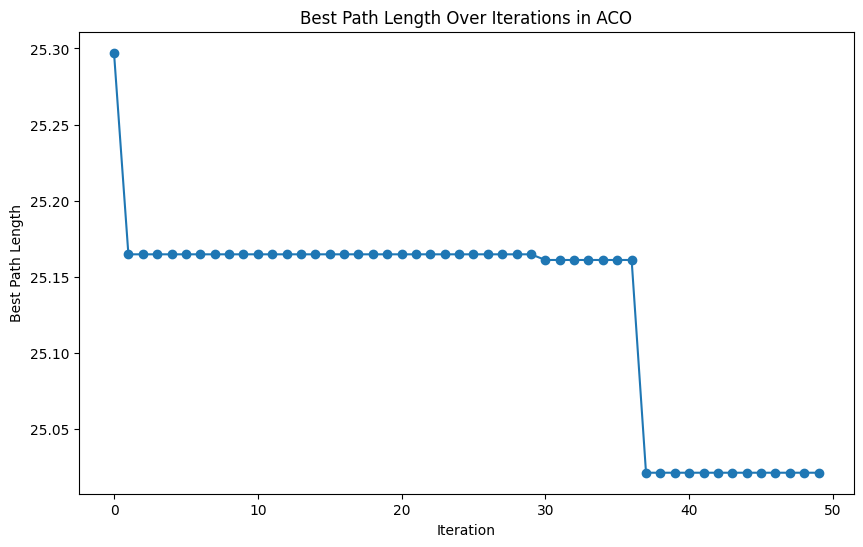

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Sample legal document corpus for testing purposes
legal_documents = corpus

# Calculate the similarity matrix using TF-IDF and Cosine Similarity
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(legal_documents)
similarity_matrix = cosine_similarity(tfidf_matrix)
distance_matrix = 1 - similarity_matrix
np.fill_diagonal(distance_matrix, np.inf)  # No self-loops

# ACO Parameters
num_ants = 5
num_iterations = 50
alpha = 1
beta = 2
evaporation_rate = 0.5
pheromone_deposit = 100
pheromone_matrix = np.ones(distance_matrix.shape) / len(distance_matrix)

# Function to choose next node
def choose_next_node(current_node, unvisited, pheromone_matrix, distance_matrix, alpha, beta):
    pheromone = pheromone_matrix[current_node, unvisited] ** alpha
    heuristic = (1 / distance_matrix[current_node, unvisited]) ** beta
    probabilities = pheromone * heuristic
    probabilities /= probabilities.sum()
    return np.random.choice(unvisited, p=probabilities)

# Function to update pheromones
def update_pheromones(pheromone_matrix, paths, path_lengths, evaporation_rate, pheromone_deposit):
    pheromone_matrix *= (1 - evaporation_rate)
    for path, path_length in zip(paths, path_lengths):
        for i in range(len(path) - 1):
            pheromone_matrix[path[i], path[i + 1]] += pheromone_deposit / path_length

# Function to calculate path length
def calculate_path_length(path, distance_matrix):
    return sum(distance_matrix[path[i], path[i + 1]] for i in range(len(path) - 1))

# ACO algorithm
def ant_colony_optimization(num_iterations, num_ants, distance_matrix, alpha, beta, evaporation_rate, pheromone_deposit):
    num_nodes = distance_matrix.shape[0]
    best_path = None
    best_length = np.inf
    best_lengths = []  # Track best length for each iteration

    for iteration in range(num_iterations):
        paths = []
        path_lengths = []

        for _ in range(num_ants):
            unvisited = list(range(num_nodes))
            current_node = np.random.choice(unvisited)
            path = [current_node]
            unvisited.remove(current_node)

            while unvisited:
                next_node = choose_next_node(current_node, unvisited, pheromone_matrix, distance_matrix, alpha, beta)
                path.append(next_node)
                unvisited.remove(next_node)
                current_node = next_node

            path_length = calculate_path_length(path, distance_matrix)
            paths.append(path)
            path_lengths.append(path_length)

            if path_length < best_length:
                best_path = path
                best_length = path_length

        # Update pheromones and track best path length for plotting
        update_pheromones(pheromone_matrix, paths, path_lengths, evaporation_rate, pheromone_deposit)
        best_lengths.append(best_length)

    return best_path, best_length, best_lengths

# Run the ACO algorithm and collect the best lengths
best_path, best_length, best_lengths = ant_colony_optimization(
    num_iterations, num_ants, distance_matrix, alpha, beta, evaporation_rate, pheromone_deposit
)

# Plot the best length over iterations
plt.figure(figsize=(10, 6))
plt.plot(range(num_iterations), best_lengths, marker='o')
plt.title("Best Path Length Over Iterations in ACO")
plt.xlabel("Iteration")
plt.ylabel("Best Path Length")
plt.show()


In [3]:
import numpy as np

from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.metrics.pairwise import cosine_similarity

import random



# Step 1: Legal document corpus

legal_documents = corpus



# Step 2: User's issue as input query

user_issue = "Somebody breached our contract and caused financial loss. What legal actions can we take?"



# Step 3: Fine-tuned TF-IDF Vectorizer for document-query similarity

# Creating a combined vectorizer for documents and query

vectorizer = TfidfVectorizer(ngram_range=(1, 2), max_df=0.85, stop_words='english')

# Fit and transform on both documents and query

combined_corpus = legal_documents + [user_issue]

combined_tfidf_matrix = vectorizer.fit_transform(combined_corpus)



# Separate TF-IDF matrices for documents and query

document_tfidf_matrix = combined_tfidf_matrix[:-1]  # All but the last element (documents)

query_tfidf_matrix = combined_tfidf_matrix[-1]  # The last element (query)



# Calculate cosine similarity between each document and the query

similarity_scores = cosine_similarity(document_tfidf_matrix, query_tfidf_matrix).flatten()



# Step 4: Create a distance matrix for ACO (1 - similarity scores)

distance_matrix = 1 - similarity_scores

num_documents = len(legal_documents)



# ACO Parameters 

num_ants = 5

num_iterations = 50

alpha = 1  # Pheromone importance

beta = 3  # Distance importance increased for more sensitivity to similarity

evaporation_rate = 0.2

pheromone_deposit = 50

top_k = 3  # Number of relevant documents to retrieve



# Initialize pheromone levels

pheromone_matrix = np.ones(num_documents) / num_documents



# Function to choose the next document based on probabilities

def choose_next_document(pheromones, distances, alpha, beta):

    pheromone_factor = pheromones ** alpha

    distance_factor = (1 / distances) ** beta

    probabilities = pheromone_factor * distance_factor

    probabilities /= probabilities.sum()



    return np.random.choice(range(len(legal_documents)), p=probabilities)



# Function to update pheromone levels

def update_pheromones(pheromones, documents_visited, evaporation_rate, pheromone_deposit):

    pheromones *= (1 - evaporation_rate)  # Evaporate pheromones

    for document in documents_visited:

        pheromones[document] += pheromone_deposit  # Add pheromone to visited documents



# ACO Algorithm for document retrieval

def ant_colony_optimization(num_iterations, num_ants, distance_matrix, pheromone_matrix, alpha, beta, evaporation_rate, pheromone_deposit, top_k):

    best_documents = set()

    best_similarities = []



    for iteration in range(num_iterations):

        ant_paths = []

        ant_similarities = []



        for ant in range(num_ants):

            current_path = []

            current_similarity = 0



            # Ant selects multiple documents (paths)

            for _ in range(top_k):  # Select top_k documents per ant

                current_document = choose_next_document(pheromone_matrix, distance_matrix, alpha, beta)

                current_similarity += similarity_scores[current_document]

                current_path.append(current_document)



            # Save the chosen documents and their total similarity

            ant_paths.append(current_path)

            ant_similarities.append(current_similarity)



        # Update pheromones for all documents visited by all ants

        for path in ant_paths:

            update_pheromones(pheromone_matrix, path, evaporation_rate, pheromone_deposit)



        # Keep track of the best paths (relevant documents)

        for i in range(len(ant_paths)):

            if len(best_similarities) < top_k or ant_similarities[i] > min(best_similarities):

                best_documents.update(ant_paths[i])

                best_similarities.append(ant_similarities[i])



        print(f"Iteration {iteration + 1}: Current best documents: {list(best_documents)}")



    # Sort and return the top K most relevant documents

    sorted_best_documents = sorted(best_documents, key=lambda x: similarity_scores[x], reverse=True)



    return sorted_best_documents[:top_k]



# Find indices of concept-related documents (e.g., related to "tort law")

important_keywords = ["tort", "negligence", "defamation", "trespass"]

concept_indices = [i for i, doc in enumerate(legal_documents) if any(keyword in doc.lower() for keyword in important_keywords)]



# Run the ACO algorithm to find the top K relevant documents including the concept-related ones

best_documents_indices = ant_colony_optimization(num_iterations, num_ants, distance_matrix, pheromone_matrix, alpha, beta, evaporation_rate, pheromone_deposit, top_k)



# Output the most relevant legal documents for the user's issue

print(f"\nTop {top_k} most relevant legal documents for your issue:")

for idx in best_documents_indices:

    print(f"Document {idx}: {legal_documents[idx]}")


Iteration 1: Current best documents: [1, 2, 3, 6, 13, 17, 18, 20, 23]
Iteration 2: Current best documents: [1, 2, 3, 4, 6, 13, 17, 18, 20, 23]
Iteration 3: Current best documents: [1, 2, 3, 4, 6, 13, 17, 18, 20, 23, 24]
Iteration 4: Current best documents: [1, 2, 3, 4, 6, 13, 17, 18, 20, 23, 24]
Iteration 5: Current best documents: [1, 2, 3, 4, 6, 13, 17, 18, 20, 23, 24]
Iteration 6: Current best documents: [1, 2, 3, 4, 6, 13, 17, 18, 20, 23, 24]
Iteration 7: Current best documents: [1, 2, 3, 4, 6, 13, 14, 17, 18, 20, 23, 24]
Iteration 8: Current best documents: [1, 2, 3, 4, 6, 13, 14, 17, 18, 20, 23, 24]
Iteration 9: Current best documents: [1, 2, 3, 4, 6, 13, 14, 17, 18, 20, 23, 24]
Iteration 10: Current best documents: [1, 2, 3, 4, 6, 13, 14, 17, 18, 20, 23, 24]
Iteration 11: Current best documents: [1, 2, 3, 4, 6, 13, 14, 17, 18, 20, 23, 24]
Iteration 12: Current best documents: [1, 2, 3, 4, 6, 13, 14, 17, 18, 20, 23, 24]
Iteration 13: Current best documents: [1, 2, 3, 4, 6, 13, 14

# Particle Swarm Optimization (PSO) for Legal Document Retrieval

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


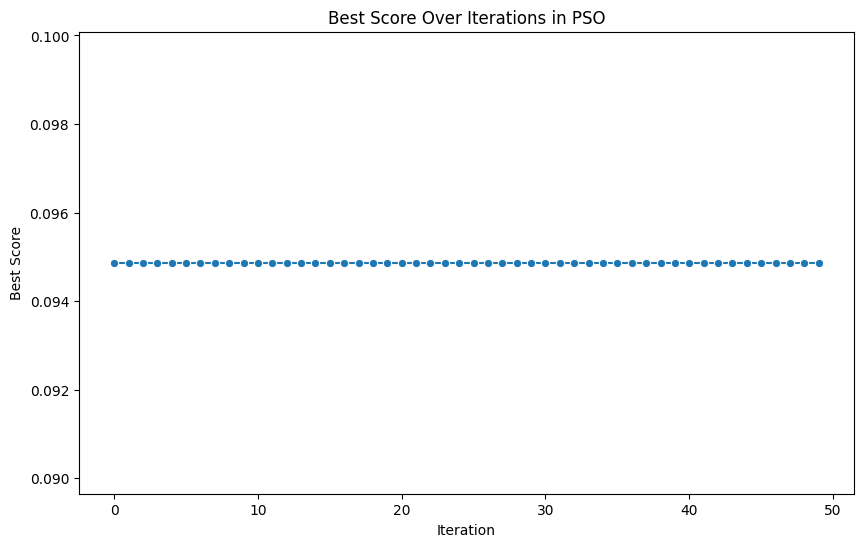

In [10]:
import numpy as np

import random

import seaborn as sns

import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.metrics.pairwise import cosine_similarity



# Sample Legal document corpus

legal_documents = corpus



# User's issue as input query

user_issue = "Somebody breached our contract and caused financial loss. What legal actions can we take?"



# Fine-tuned TF-IDF Vectorizer for document-query similarity

vectorizer = TfidfVectorizer(ngram_range=(1, 2), max_df=0.85, stop_words='english')

combined_corpus = legal_documents + [user_issue]

combined_tfidf_matrix = vectorizer.fit_transform(combined_corpus)



document_tfidf_matrix = combined_tfidf_matrix[:-1]

query_tfidf_matrix = combined_tfidf_matrix[-1]



similarity_scores = cosine_similarity(document_tfidf_matrix, query_tfidf_matrix).flatten()



# PSO Parameters

num_particles = 10

num_iterations = 50

top_k = 3



# Initialize particles and velocities

particles = [random.sample(range(len(legal_documents)), top_k) for _ in range(num_particles)]

velocities = [random.sample(range(len(legal_documents)), top_k) for _ in range(num_particles)]



# Initialize best positions and scores

particle_best_positions = particles.copy()

particle_best_scores = [sum(similarity_scores[particle]) for particle in particles]



# Initialize global best

global_best_position = particle_best_positions[np.argmax(particle_best_scores)]

global_best_score = max(particle_best_scores)



# PSO Parameters

w = 0.5  # Inertia weight

c1 = 1.5  # Cognitive component

c2 = 2.0  # Social component



# Track best score for each iteration

best_scores = []



def update_velocity(velocity, particle, best_position, global_best_position):

    new_velocity = velocity.copy()

    for i in range(len(velocity)):

        if random.random() < 0.5:

            new_velocity[i] = best_position[i]

        else:

            new_velocity[i] = global_best_position[i]

    return new_velocity



def update_position(particle, velocity):

    new_particle = particle.copy()

    for i in range(len(velocity)):

        if velocity[i] not in new_particle:

            new_particle[i] = velocity[i]

    return new_particle



# PSO Algorithm

for iteration in range(num_iterations):

    for i in range(num_particles):

        # Update velocity and position

        velocities[i] = update_velocity(velocities[i], particles[i], particle_best_positions[i], global_best_position)

        particles[i] = update_position(particles[i], velocities[i])



        # Calculate fitness score

        current_score = sum(similarity_scores[particles[i]])



        # Update personal and global best

        if current_score > particle_best_scores[i]:

            particle_best_positions[i] = particles[i]

            particle_best_scores[i] = current_score



        if current_score > global_best_score:

            global_best_position = particles[i]

            global_best_score = current_score



    # Track the best score for this iteration

    best_scores.append(global_best_score)



# Plot the best score over iterations

plt.figure(figsize=(10, 6))

sns.lineplot(x=range(num_iterations), y=best_scores, marker='o')

plt.title("Best Score Over Iterations in PSO")

plt.xlabel("Iteration")

plt.ylabel("Best Score")

plt.show()


# Firefly Algorithm for Legal Document Retrieval

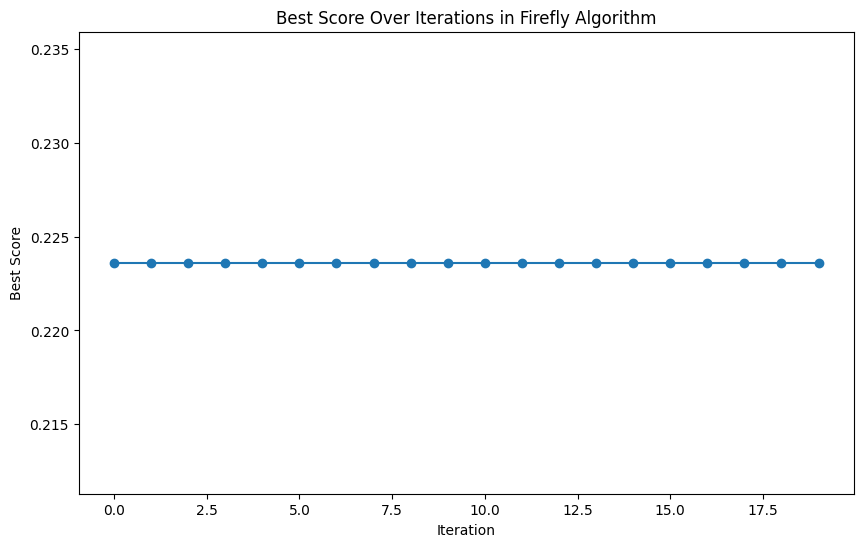

In [11]:
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Sample Legal document corpus for demonstration
legal_documents = corpus

# User's issue as input query
user_issue = "Somebody breached our contract and caused financial loss. What legal actions can we take?"

# TF-IDF Vectorizer for document-query similarity
vectorizer = TfidfVectorizer(ngram_range=(1, 2), max_df=0.8, max_features=500, stop_words='english')
combined_corpus = legal_documents + [user_issue]
combined_tfidf_matrix = vectorizer.fit_transform(combined_corpus)

document_tfidf_matrix = combined_tfidf_matrix[:-1]
query_tfidf_matrix = combined_tfidf_matrix[-1]

similarity_scores = cosine_similarity(document_tfidf_matrix, query_tfidf_matrix).flatten()

# Firefly Algorithm Parameters
num_fireflies = 5
num_iterations = 20
top_k = 3

# Initialize fireflies based on top-ranked documents
initial_candidates = np.argsort(similarity_scores)[-top_k:]
fireflies = [list(initial_candidates) for _ in range(num_fireflies)]

# Initialize light intensities based on similarity scores
light_intensities = [sum(similarity_scores[firefly]) for firefly in fireflies]

# Firefly parameters
gamma = 0.8
alpha = 0.1

# Precomputed distances between documents
distance_matrix = cosine_similarity(document_tfidf_matrix)

# Function to update positions
def update_position(firefly, brighter_firefly):
    new_firefly = list(brighter_firefly)
    while len(new_firefly) < len(firefly):
        candidate = np.argmax(similarity_scores)
        if candidate not in new_firefly:
            new_firefly.append(candidate)
    return new_firefly

# Track best scores for plotting
best_scores = []

# Firefly Algorithm Optimization
for iteration in range(num_iterations):
    for i in range(num_fireflies):
        for j in range(num_fireflies):
            if light_intensities[j] > light_intensities[i]:  # Move towards brighter firefly
                distance = 1 - np.mean(distance_matrix[fireflies[i], fireflies[j]])
                if distance > 0:
                    fireflies[i] = update_position(fireflies[i], fireflies[j])
                    new_score = sum(similarity_scores[fireflies[i]])
                    if new_score > light_intensities[i]:
                        light_intensities[i] = new_score

    # Track the best score for this iteration
    best_score = max(light_intensities)
    best_scores.append(best_score)

# Plotting the best score over iterations
plt.figure(figsize=(10, 6))
plt.plot(range(num_iterations), best_scores, marker='o')
plt.title("Best Score Over Iterations in Firefly Algorithm")
plt.xlabel("Iteration")
plt.ylabel("Best Score")
plt.show()
